# Runge Kutta Solution for Coupled Pendulum (i.e. Metronomes)

**(October 27, 2023)**

In [64]:
import numpy as np
import matplotlib.pyplot as plt

### Runge Kutta for Pendulum with Escapement (i.e. van der Pol oscillator)

$$ \ddot{\theta} = - \frac{g}{\ell} \sin \theta - \epsilon \left(\frac{\theta^2}{\theta_E^2}-1\right)\dot{\theta}$$

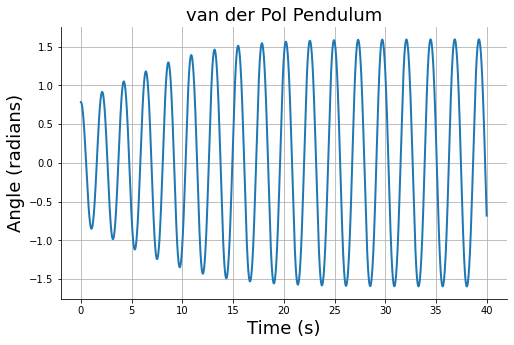

In [65]:
## Code for single pendulum

# Function to define the differential equation
def pendulum(theta, omega,  thetaE, eps, L, g):
    dtheta_dt = omega
    domega_dt = -(g / L) * np.sin(theta) - eps* (theta**2/thetaE**2-1)*omega
    return dtheta_dt, domega_dt

# Runge-Kutta method to solve the differential equation
def runge_kutta(h, N, theta0, omega0, thetaE, eps, L, g):
    theta = np.zeros(N)
    omega = np.zeros(N)
    
    theta[0] = theta0
    omega[0] = omega0
    
    for i in range(1, N):
        k1_theta, k1_omega = pendulum(theta[i-1], omega[i-1], thetaE, eps, L, g)
        k2_theta, k2_omega = pendulum(theta[i-1] + h/2 * k1_theta, omega[i-1] + h/2 * k1_omega, thetaE, eps, L, g)
        k3_theta, k3_omega = pendulum(theta[i-1] + h/2 * k2_theta, omega[i-1] + h/2 * k2_omega, thetaE, eps, L, g)
        k4_theta, k4_omega = pendulum(theta[i-1] + h * k3_theta, omega[i-1] + h * k3_omega, thetaE, eps, L, g)
        
        theta[i] = theta[i-1] + h * (k1_theta + 2*k2_theta + 2*k3_theta + k4_theta) / 6
        omega[i] = omega[i-1] + h * (k1_omega + 2*k2_omega + 2*k3_omega + k4_omega) / 6
    
    return theta, omega

# Parameters
L = 1.0  # Length of the pendulum
g = 9.81  # Acceleration due to gravity
theta0 = np.pi / 4  # Initial angle (45 degrees)
omega0 = 0.0  # Initial angular velocity
thetaE = np.pi / 4
eps = 0.2

# Time parameters
t0 = 0.0
t_max = 40.0
N = 5000  # Number of time steps
h = (t_max - t0) / N

# Solve the pendulum motion using Runge-Kutta
theta, omega = runge_kutta(h, N, theta0, omega0, thetaE, eps, L, g)

# Plot the results
plt.figure(figsize = (8,5))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Plot the results
t = np.linspace(t0, t_max, N)
plt.plot(t, theta, linewidth = 2)
plt.xlabel('Time (s)', fontsize = 18)
plt.ylabel('Angle (radians)', fontsize = 18)
plt.title('van der Pol Pendulum', fontsize = 18)
plt.grid(True)
plt.savefig('van_der_pol_pendulum.png', bbox_inches = 'tight')
plt.show()


### Runge Kutta for Coupled Pendula

We define the sum and difference quantities as 
$$ \sigma \equiv \frac{\phi_1 + \phi_2}{2\phi_0}, \qquad \delta \equiv \frac{\phi_1 - \phi_2}{2\phi_0} $$

And we have the associated equation of motion for $\sigma$ is 

\begin{align}
\ddot{\sigma} 
% & = - \frac{g}{\ell} \left(1 + \frac{2m}{M}\right)\sigma - \epsilon \left(1 + \frac{2m}{M}\right)\frac{d}{dt}\left[\sigma\left(\delta^2 + \frac{1}{3} \sigma^2 -1\right)\right]\\
%  & = - \frac{g}{\ell} \left(1 + \frac{2m}{M}\right)\sigma - \epsilon \left(1 + \frac{2m}{M}\right)\left[\dot{\sigma}\left(\delta^2 + \frac{1}{3} \sigma^2 -1\right) + \sigma\left(2\delta \dot{\delta} + \frac{2}{3} \sigma \dot{\sigma}\right)\right] \\[.5em]
  & = - \frac{g}{\ell} \left(1 + 2 r\right)\sigma - \epsilon \left(1 + 2r\right)\big(\dot{\sigma} (\delta^2 + \sigma^2 -1)+ 2\sigma \delta \dot{\delta}\big)
\end{align}

where we defined $r \equiv m/M$. And for $\delta$ we obtain

\begin{align}
\ddot{\delta} & = - \frac{g}{\ell} \delta- \epsilon\big(\dot{\delta} (\sigma^2 + \delta^2 -1)+ 2\delta \sigma\dot{\sigma}\big)
\end{align}

In [66]:

def coupled_pendula(t, state, eps, thetaE, g, M, m):
    # variable t is not used but we include it to keep 
    # track of each step of the method    
    sigma, p, delta, q = state
    dsigma_dt = p
    dp_dt = - g*sigma*(1+2*m/M) - eps*(1+2*m/M)*(p*(delta**2 + sigma**2-1)+2*sigma*delta*q)
    ddelta_dt = q
    dq_dt = - g*delta - eps*(q*(sigma**2 + delta**2-1)+2*delta*sigma*p)
    
    return np.array([dsigma_dt, dp_dt, ddelta_dt, dq_dt])

# Runge-Kutta method to solve the system of differential equations
def runge_kutta(h, N, initial_state, eps, thetaE, g, M, m):
    state = np.array(initial_state)
    trajectory = [state]
    
    for t in range(N):
        # variable t is not used but we include it to keep 
        # track of each step of the method
        k1 = coupled_pendula(t, state, eps, thetaE, g, M, m)
        k2 = coupled_pendula(t + 0.5*h, state + 0.5*h*k1, eps, thetaE, g, M, m)
        k3 = coupled_pendula(t + 0.5*h, state + 0.5*h*k2, eps, thetaE, g, M, m)
        k4 = coupled_pendula(t + h, state + h*k3, eps, thetaE, g, M, m)
        
        state = state + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
        trajectory.append(state)
    
    return np.array(trajectory)

#### Coupled Pendula with no coupling

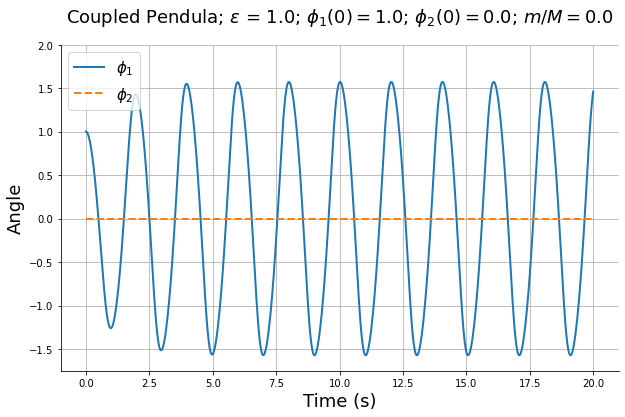

In [67]:
# Parameters
g = 9.81  # length is set to 1
M = 10.0 
m = 0.0
thetaE = np.pi / 4
eps = 1.0

# Time parameters
t0 = 0.0
t_max = 20.0
N = 1000  # Number of time steps
h = (t_max - t0) / N

# Initial conditions [x, p, y, q]
initial_state = [1/(2.0*thetaE), 0.0 , 1/(2.0*thetaE), 0.0]

# Solve the coupled oscillators system using Runge-Kutta
trajectory = runge_kutta(h, N, initial_state, eps, thetaE,  g, M, m)

# Extract the positions of the oscillators
sigma_values = trajectory[:, 0]
delta_values = trajectory[:, 2]
theta1_values = (sigma_values+delta_values)*(thetaE)
theta2_values = (sigma_values-delta_values)*(thetaE)

# Plot the results
plt.figure(figsize = (10,6))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

t = np.linspace(t0, t_max, N+1)
plt.plot(t, theta1_values, linewidth = 2, label=r'$\phi_1$')
plt.plot(t, theta2_values, '--', linewidth = 2, label=r'$\phi_2$')
plt.xlabel('Time (s)', fontsize = 18)
plt.ylabel('Angle', fontsize = 18)
plt.title(fr'Coupled Pendula; $\epsilon$ = {eps}; $\phi_1(0)={theta1_values[0]}$; $\phi_2(0) ={theta2_values[0]}$; $m/M = {m/M}$', fontsize = 18, y= 1.05)
plt.legend(fontsize = 15)
plt.ylim([-1.75, 2.0])
plt.grid(True)
plt.savefig('coupled_pendula_nocoupling.png', bbox_inches = 'tight')
plt.show()

#### Coupled Pendula with no "Escapement" Term

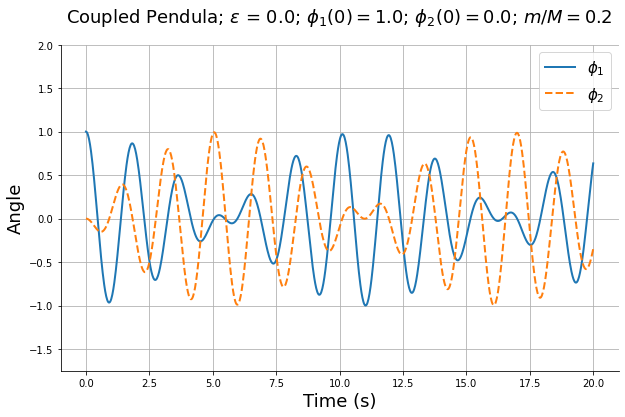

In [68]:
# Parameters
g = 9.81  # length is set to 1
M = 10.0 
m = 2.0
thetaE = np.pi / 4
eps = 0.0

# Time parameters
t0 = 0.0
t_max = 20.0
N = 1000  # Number of time steps
h = (t_max - t0) / N

# Initial conditions [x, p, y, q]
initial_state = [1/(2.0*thetaE), 0.0 , 1/(2.0*thetaE), 0.0]

# Solve the coupled oscillators system using Runge-Kutta
trajectory = runge_kutta(h, N, initial_state, eps, thetaE,  g, M, m)

# Extract the positions of the oscillators
sigma_values = trajectory[:, 0]
delta_values = trajectory[:, 2]
theta1_values = (sigma_values+delta_values)*(thetaE)
theta2_values = (sigma_values-delta_values)*(thetaE)

# Plot the results
plt.figure(figsize = (10,6))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

t = np.linspace(t0, t_max, N+1)
plt.plot(t, theta1_values, linewidth = 2, label=r'$\phi_1$')
plt.plot(t, theta2_values, '--', linewidth = 2, label=r'$\phi_2$')
plt.xlabel('Time (s)', fontsize = 18)
plt.ylabel('Angle', fontsize = 18)
plt.title(fr'Coupled Pendula; $\epsilon$ = {eps}; $\phi_1(0)={theta1_values[0]}$; $\phi_2(0) ={theta2_values[0]}$; $m/M = {m/M}$', fontsize = 18, y= 1.05)
plt.legend(fontsize = 15)
plt.ylim([-1.75, 2.0])
plt.grid(True)
plt.savefig('coupled_pendula_no_escapement.png', bbox_inches = 'tight')
plt.show()

#### Coupled Pendula with Symmetric Oscillations

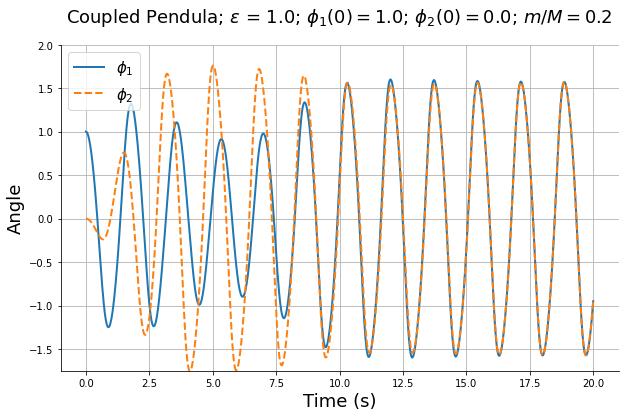

In [69]:
# Parameters
g = 9.81  # length is set to 1
M = 10.0 
m = 2.0
thetaE = np.pi / 4
eps = 1.0

# Time parameters
t0 = 0.0
t_max = 20.0
N = 1000  # Number of time steps
h = (t_max - t0) / N

# Initial conditions [x, p, y, q]
initial_state = [1/(2.0*thetaE), 0.0 , 1/(2.0*thetaE), 0.0]

# Solve the coupled oscillators system using Runge-Kutta
trajectory = runge_kutta(h, N, initial_state, eps, thetaE,  g, M, m)

# Extract the positions of the oscillators
sigma_values = trajectory[:, 0]
delta_values = trajectory[:, 2]
theta1_values = (sigma_values+delta_values)*(thetaE)
theta2_values = (sigma_values-delta_values)*(thetaE)

# Plot the results
plt.figure(figsize = (10,6))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

t = np.linspace(t0, t_max, N+1)
plt.plot(t, theta1_values, linewidth = 2, label=r'$\phi_1$')
plt.plot(t, theta2_values, '--', linewidth = 2, label=r'$\phi_2$')
plt.xlabel('Time (s)', fontsize = 18)
plt.ylabel('Angle', fontsize = 18)
plt.title(fr'Coupled Pendula; $\epsilon$ = {eps}; $\phi_1(0)={theta1_values[0]}$; $\phi_2(0) ={theta2_values[0]}$; $m/M = {m/M}$', fontsize = 18, y= 1.05)
plt.legend(fontsize = 15)
plt.ylim([-1.75, 2.0])
plt.grid(True)
plt.savefig('coupled_pendula_symm.png', bbox_inches = 'tight')
plt.show()

#### Coupled Pendula with Anti-Symmetric Oscillations

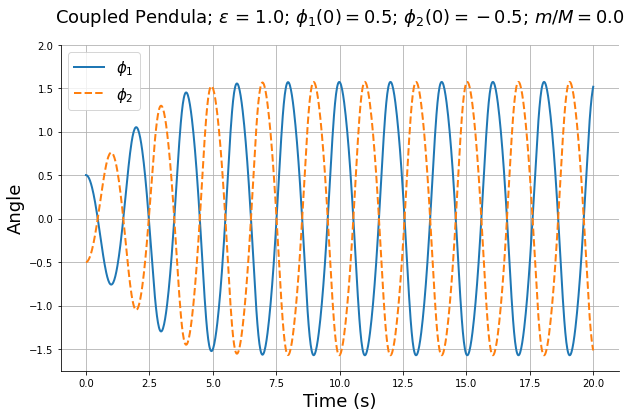

In [70]:
# Parameters
g = 9.81  # length is set to 1
M = 10.0 
m = 0.0
thetaE = np.pi / 4
eps = 1.0

# Time parameters
t0 = 0.0
t_max = 20.0
N = 1000  # Number of time steps
h = (t_max - t0) / N

# Initial conditions [x, p, y, q]
initial_state = [0.0, 0.0 , 1/(2.0*thetaE), 0.0]

# Solve the coupled oscillators system using Runge-Kutta
trajectory = runge_kutta(h, N, initial_state, eps, thetaE,  g, M, m)

# Extract the positions of the oscillators
sigma_values = trajectory[:, 0]
delta_values = trajectory[:, 2]
theta1_values = (sigma_values+delta_values)*(thetaE)
theta2_values = (sigma_values-delta_values)*(thetaE)

# Plot the results
plt.figure(figsize = (10,6))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

t = np.linspace(t0, t_max, N+1)
plt.plot(t, theta1_values, linewidth = 2, label=r'$\phi_1$')
plt.plot(t, theta2_values, '--', linewidth = 2, label=r'$\phi_2$')
plt.xlabel('Time (s)', fontsize = 18)
plt.ylabel('Angle', fontsize = 18)
plt.title(fr'Coupled Pendula; $\epsilon$ = {eps}; $\phi_1(0)={theta1_values[0]}$; $\phi_2(0) ={theta2_values[0]}$; $m/M = {m/M}$', fontsize = 18, y= 1.05)
plt.legend(fontsize = 15)
plt.ylim([-1.75, 2.0])
plt.grid(True)
plt.savefig('coupled_pendula_antisymm.png', bbox_inches = 'tight')
plt.show()